# Revisión (segunda iteración)

Hola, José!

Me da gusto continuar con la revisión de tu trabajo. Mi nombre es David Esparza Jasso. Puedes encontrar los comentarios de esta segunda iteración con un "**V2**" en su título.

<div class="alert alert-block alert-success">
<b>COMENTARIO GENERAL SEGUNDA REVISIÓN</b> <a class="tocSkip"></a>

José, felicidades! Tu trabajo está aprobado. No tengo más que decir, aplicaste las correcciones correctamente. Te dejé sólo un par de comentarios amarillos para que por favor los revises y te puedan ayudar para futuros trabajos :) También te respondí a una duda que me preguntaste en la sección de comprobación de hipótesis. Sigue esforzándote así.

</div>

# Revisión (primera iteración)

Hola, José!

Mi nombre es David Esparza Jasso y estoy feliz por revisar tu proyecto el día de hoy.



Encontrarás mis comentarios abajo. - **por favor, no los muevas, modifiques o elimines**.


Puedes encontrar mis comentarios en cajas verdes, amarillas y rojas como éstas:

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Correcto. Todo se hizo correctamente!
</div>

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Necesita correcciones. La parte correspondiente requiere algunas correcciones. El trabajo no puede ser aprobado con comentarios rojos sin corregir.
</div>

Puedes contestarme usando este tipo de cajas:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
En celdas como éstas puedes dejarme tus comentarios
</div>

Recuerda que, si deseas dejarme un comentario en alguna parte del documento, sólo tienes que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como éstas puedes dejarme tus comentarios" por tu propio comentario. Asegúrate sólamente que la celda donde vayas a incluir tu comentario esté en formato "Markdown".

<div class="alert alert-block alert-warning">
<b>COMENTARIO GENERAL PRIMERA REVISIÓN</b> <a class="tocSkip"></a>

José, buen trabajo en general! Veo que entiendes bien las funciones, las tablas dinámicas, la correlación como herramienta útil, haces bonitas gráficas, etc.
    
Aún queda un poco de trabajo por hacer, este proyecto era complicado, te quedan pocas correcciones pero sustanciales, por favor, corrígelas y reenvía tu trabajo. Vamos muy bien, y estoy seguro que esto que te queda puedes hacerlo fácilmente ;) Recuerda que si necesitas más apoyo también puedes acudir con tu tutor! saludos!

</div>

# Ice, games sales

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muchas gracias por poner títulos y subtítulos, así como una tabla de contenidos!

Objetivo del proyecto: Vamos a analizar las ventas de videojuegos a partir de los datos históricos que se tienen. Identificaremos patrones que determinen si un juego tiene éxito o no. Esto nos ayudará a planificar campañas publicitarias para próximos años.

Descripción de los datos
- Name (Nombre)
- Platform (Plataforma)
- Year_of_Release (Año de lanzamiento)
- Genre (Género)
- NA_sales (ventas en Norteamérica en millones de dólares estadounidenses)
- EU_sales (ventas en Europa en millones de dólares estadounidenses)
- JP_sales (ventas en Japón en millones de dólares estadounidenses)
- Other_sales (ventas en otros países en millones de dólares estadounidenses)
- Critic_Score (máximo de 100)
- User_Score (máximo de 10)
- Clasificación (ESRB)

Vamos a importar las libreríasn necesarias para el proyecto.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st

Vamos a importar la base de datos en formato CSV.

In [2]:
games = pd.read_csv('/datasets/games.csv')

### Preprocesamiento de datos

Vamos a echar un vistazo general a la base de datos para ver las columnas y sus formatos.

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Vamos a ajustar el nombre de las columnas a minusculas.

In [4]:
games.columns = ['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen inicio! El read con la ruta correcta, el head, y el info!</div>

Vamos a eliminar los valores ausentes de la columna year_of_release y a convertir a formato int.

In [6]:
games = games.dropna(subset = ['year_of_release'])

In [7]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [8]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

No sería conveniente eliminar las filas con ausentes en el año de lanzamiento? son muy pocas</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Tienes razón! Las eliminaré ahora.

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Gracias por atender la recomendación! :)

user_score tiene formato object. Vamos a cambiarla a númerica. Pero antes, vamos a cambiar los valores de tbd a NaN para poder cambiar el formato.

In [9]:
games.loc[games.user_score == 'tbd', 'user_score'] = np.nan

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buena decisión la de arriba, así ya puedes convertir a float!</div>

In [10]:
games['user_score'] = pd.to_numeric(games['user_score'])

In [11]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Hay valores nulos en las columnas de critic_score, user_score y rating. Sin embargo, esta información es necesaria para contestar las preguntas del negocio, por lo que no podemos inventarnos valores para estas columnas. Entonces pasaremos a dejar estas columnas con los valores nulos.

Para las columnas de name y genre, vamos a eliminar las dos filas que tienen valores ausentes en sus columnas ya que son muy pocas.

In [12]:
games = games.dropna(subset = ['name', 'genre'])

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Ok, pero te faltó decir qué harás con el resto de columnas con valores ausentes y por qué. 
    
* Para critic_score, user_score y rating es una posibilidad no hacer nada con los ausentes, pero debes explicar por qué si es que decides esta opción. 

* También la columna name y la columna genre tienen muuuy pocos ausentes, ¿qué sería bueno hacer con esas filas?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Tiene sentido. Ya quedó corregido.

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Gracias, perfectamente aplicada la corrección!

Ahora vamos a calcular las ventas totales de todas las regiones y almacenarla en la variable total_sales.

In [13]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [14]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Análisis de datos

Vamos a hacer un analisis con una tabla dinamica para observar las fechas de lanzamiento a través de los años.

<AxesSubplot:xlabel='year_of_release'>

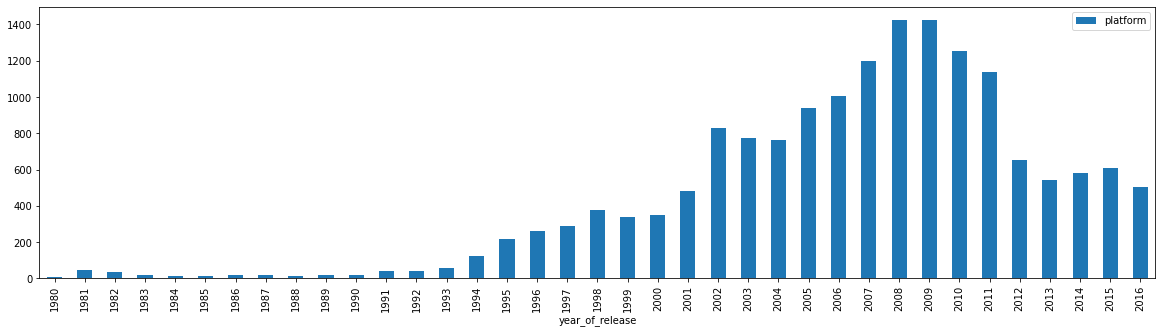

In [15]:
games_release_year_pivot = games.pivot_table(index='year_of_release', values='platform', aggfunc='count')
games_release_year_pivot.plot(kind='bar', figsize=(20,5))

A partir de 1994, los lanzamientos de juegos comenzaron a subir, hasta llegar en su punto máximo el año 2008 y 2009.

Ahora, vamos a observar las ventas totales por plataforma para ver cuales han tenido mayor éxito.

<AxesSubplot:xlabel='platform'>

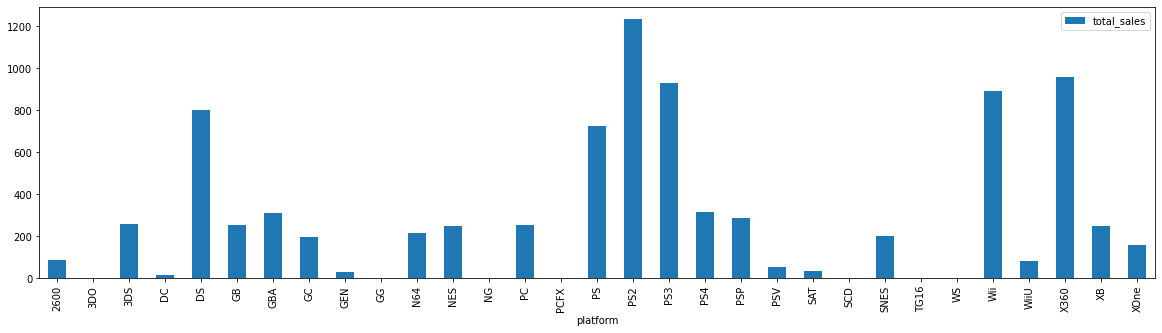

In [16]:
games_platform_pivot = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
games_platform_pivot.plot(kind='bar', figsize=(20,5))

In [17]:
games_platform_pivot.sort_values(by='total_sales', ascending=False).head()

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78


Las plataformas con ventas más altas son: 
- #1 Playstation 2
- #2 Xbox 360
- #3 Playstation 3 
- #4 Wii 
- #5 Nintendo DS.

Observando los valores de algunas plataformas, muchas tienen valores no relevantes, por lo que vamos a filtrar estas plataformas para tenener una gráfica más concisa. Además, vamos a filtrar por año para ver los lanzamientos a través del tiempo a partir del año 1991.

In [18]:
games_filtered = games.query('platform ==["DS", "PS", "PS2", "PS3","Wii", "X360", "XB"] & year_of_release > 1990')

<AxesSubplot:xlabel='year_of_release'>

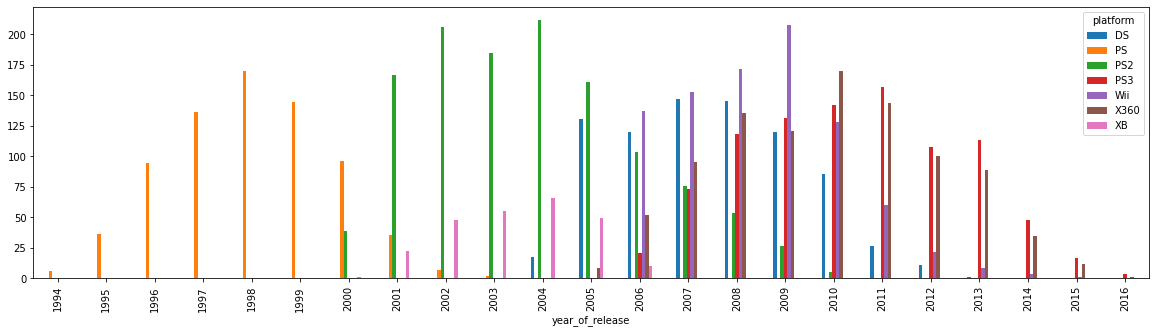

In [19]:
games_filtered_release_year_platform_pivot = games_filtered.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
games_filtered_release_year_platform_pivot.plot(kind='bar', figsize=(20,5))

- El PS2 comenzó a tener ventas a partir del 2000, teniendo su pico mas alto en el 2004. Sin embargo a partir de ese año se ve una baja en las ventas de esta plataforma. Le tomó 4 años llegar a su pico más alto y le tomó 6 años volver hasta abajo.
- El PS1 comenzó a tener ventas en 1994, teniendo su pico más alto 4 años después en 1998. Le tomaron otros 4 años para volver a no tener ventas.
- El PS3 comenzó a tener ventas en el 2006, teniendo su pico más alto en el 2011 (5 años después) y comenzó a bajar durante 5 años hasta que llegó a tener ventas muy bajas en el 2016.
- El Xbox 360 comenzó a tener ventas en el 2005, teniendo su pico más alto en el 2010 (5 años después)y comenzó a bajar hasta tener casi ventas nulas en el 2016.
- El Wii comenzó a tener ventas en el 2006, alcanzando su pico máximo en 2009, solo 3 años despues de su lanzamiento, y fue perdiendo su popularidad hasta llegar al 2014 (5 años después).

Viendo estos datos podemos asumir que el tiempo aproximado para que una plataforma llegue a su punto de ventas más alta es de 4 a 5 años, después comienza a desplomarse poco a poco durante 5 años aproximadamente. El tiempo total de vida de una plataforma es de approx 10 años.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy buen empleo de las gráficas de barras, sobre todo esta última, y buena estrategia para ver cuántos años dura en el mercado una consola, así como tu conclusión</div>

Vamos a analizar los datos de los ultimos 6 años para ver cuales plataformas van en auge y cuales van en picada y poder determinar que juegos tienen potencial para el 2017.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Excelente decisión del periodo de tiempo para tomar tus datos</div>

<AxesSubplot:xlabel='year_of_release'>

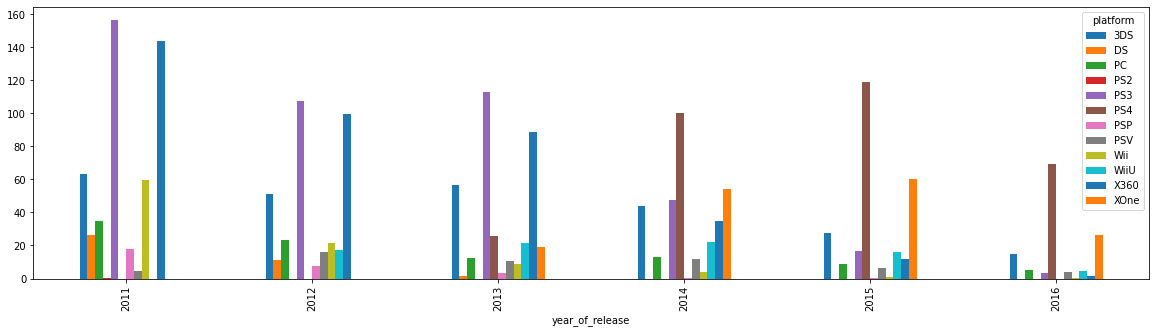

In [20]:
games_filtered_2011_2016 = games.query('year_of_release > 2010')
games_filtered_2011_2016.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20,5))

Con la tabla anterior podemos ver que el PS4 comenzó a tener ventas en el 2013 (año de su lanzamiento) y comienza a subir sus ventas. Gracias a las tendencias vistas anteriormente, podemos esperar que llegue a su pico máximo en el 2016 o 2017. También, el Xbox One está comenzando a subir y apenas tiene 4 años de su lanzamiento, por lo que también podemos esperar que llegue a su punto máximo en el 2016 o 2017. Por otra parte, el Xbox 360, el PS3 y el 3DS van en decremento en los ultimos años y muy probablemente no vuelvan a subir. 

<div class="alert alert-block alert-danger">
<b>A resolver</b> <a class="tocSkip"></a>

Cuidado! las ventas de 2016 no son tan fiables para **este** análisis de arriba en particular porque se nos dice que son datos de un 2016 inconcluso, o sea que se tomaron los datos cuando aún no se acababa el año. **Pero no cambies nada de tu código**, sólo tus conclusiones y tus elecciones de consolas potencialmente rentables hazlas observando los datos de tu gráfica **hasta** el año 2015.</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Ok tiene sentido! Quedó corregida la conclusión. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Gracias por atender la corrección! :)

Las plataformas potencialmente rentables son:
- PS4
- Xbox One

Vamos a crear un diagrama de caja de las ventas globales de todos los juegos para ver las diferencias entre ellas.

<AxesSubplot:title={'center':'total_sales'}, xlabel='platform'>

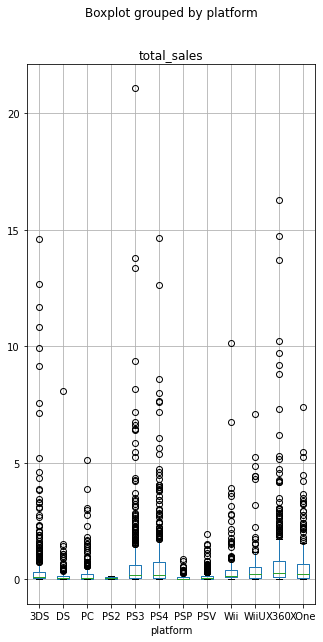

In [56]:
games_filtered_2011_2016.boxplot(column='total_sales', by='platform', figsize=(5,10))

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Sólo una pequeña corrección: se te pide hacer tus boxplots por plataforma, entonces tu gráfica de abajo es incorrecta, solamente en tu boxplot de arriba debes especificar el atributo `by='platform'`. Es decir:
    
`games_filtered_2011_2016.boxplot(column='total_sales', by='platform', figsize=(5,10))`
    
**No olvides describir tus observaciones de la gráfica corregida**
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Muchas gracias. No sabía que podían hacerse boxplots así. Ya quedó corregido.

<div class="alert alert-block alert-warning">
<b>Atención V2</b> <a class="tocSkip"></a>

Genial! sólo pudiste haber jugado con las opciones del tamaño de la gráfica y de los límites del eje y, para poder visualizar mejor sólo las cajas :)</div>

Podemos observar que en todas las plataformas hay muchos datos fuera de serie, o sea que son mayores a Q3 e inclusive al "Q3 + 1.5 IQR". Unicamente en la plataforma de PS2 no hay datos fuera de serie.

<AxesSubplot:>

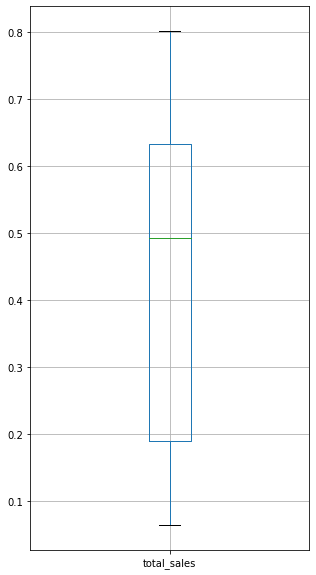

In [22]:
games_filtered_2011_2016.pivot_table(index='platform', values='total_sales').boxplot(figsize=(5,10))

#games_filtered_2011_2016.groupby('platform')['total_sales'].mean().reset_index().boxplot(figsize=(5,10))

Sin embargo, cuando agrupamos por plataforma y hacemos un promedio, las ventas se ven con una mejor distribución sin fueras de serie.

Vamos buscar la correlación de las ventas totales de la plataforma PS2 y el score tanto de profesionales, como de usuarios.

In [23]:
games_ps2 = games.query('platform == "PS2"')

games_ps2.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.154542,-0.205740,-0.105095,0.007861,-0.101062,-0.095040,-0.159505
na_sales,-0.154542,1.000000,0.664111,0.202004,0.566716,0.395324,0.172342,0.922023
eu_sales,-0.205740,0.664111,1.000000,0.228208,0.305354,0.300186,0.129374,0.784544
jp_sales,-0.105095,0.202004,0.228208,1.000000,0.176649,0.218858,0.149472,0.402724
other_sales,0.007861,0.566716,0.305354,0.176649,1.000000,0.210862,0.074949,0.714223
critic_score,-0.101062,0.395324,0.300186,0.218858,0.210862,1.000000,0.565841,0.392536
user_score,-0.095040,0.172342,0.129374,0.149472,0.074949,0.565841,1.000000,0.175055
total_sales,-0.159505,0.922023,0.784544,0.402724,0.714223,0.392536,0.175055,1.000000


<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buen checking de la correlación</div>

<AxesSubplot:xlabel='critic_score', ylabel='total_sales'>

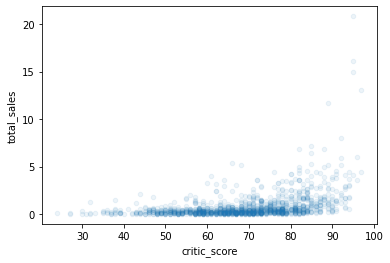

In [24]:
games_ps2.plot.scatter(x='critic_score', y='total_sales', alpha=.08)

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Bonitos estilos de gráfica de dispersión! sólo una corrección: Las ventas totales son tu variable dependiente, así que las ventas totales deben ir en el eje y, y las score en el eje x.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Tiene sentido. Ya quedó corregido. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Excelente! Así podemos visualizar de forma más natural cómo dependen las ventas de las críticas, si es que dependen.    
</div>

<AxesSubplot:xlabel='user_score', ylabel='total_sales'>

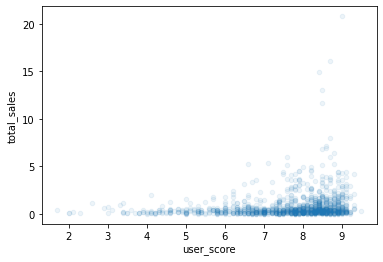

In [25]:
games_ps2.plot.scatter(x='user_score', y='total_sales', alpha=.08)

Observando el coefeciente de correlación de Pearson y junto con las gráficas, podemos ver que sí hay una correlación positiva entre las ventas totales de la plataforma PS2 y las críticas de usuarios y profesionales. Sin embargo, ambas son bajas. La correlación de los críticos es de 0.39 y el de lo usuarios de 0.17

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Bien dicho!</div>

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Aquí abajo te falta responder a una pregunta del brief:
    
* `Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.`
    
Te doy unas pistas: puedes revisar en tu dataframe games_filtered_2011_2016 cuáles han sido los 10 juegos con más ventas totales. Luego, revisar cuáles de esos juegos han salido en más de una consola, de alguna manera (por ejemplo, con filtros). Posteriormente, debes crear un dataframe con los juegos multiplataforma más vendidos que hayas encontrado, y sus ventas totales en cada plataforma en las que salieron. Después hacer alguna gráfica que muestre los resultados. Y obviamente agregar tus conclusiones y observaciones.
    
Sólo yo te doy unos tips, seguro hay muchas maneras alternativas de hacerlo, pero creo que ya entiendes a grandes rasgos lo que debes de hacer :)
</div>

Vamos a analizar cuales han sido los juegos con más ventas globales del 2011 al 2016.

In [26]:
games_filtered_2011_2016.pivot_table(index='name', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).head(10)

,total_sales
name,
Grand Theft Auto V,56.58
Call of Duty: Modern Warfare 3,30.60
Call of Duty: Black Ops II,29.40
Call of Duty: Ghosts,27.39
Call of Duty: Black Ops 3,25.67
Minecraft,24.16
Call of Duty: Advanced Warfare,21.97
The Elder Scrolls V: Skyrim,21.14
FIFA 15,17.37


Ahora, vamos a filtrar los juegos con más ventas globales y desglosarlos por plataforma para en cuales otras plataformas tuvieron ventas.

In [27]:
games_filtered_2011_2016_top5 = games_filtered_2011_2016.query('name == ["Grand Theft Auto V", "Call of Duty: Modern Warfare 3", "Call of Duty: Black Ops II", "Call of Duty: Ghosts", "Call of Duty: Black Ops 3"]')

games_filtered_2011_2016_top5.pivot_table(index='name',columns='platform', values='total_sales', aggfunc='sum')

platform,PC,PS3,PS4,Wii,WiiU,X360,XOne
name,,,,,,,
Call of Duty: Black Ops 3,0.26,1.69,14.63,NaN,NaN,1.70,7.39
Call of Duty: Black Ops II,1.52,13.79,NaN,NaN,0.41,13.68,NaN
Call of Duty: Ghosts,0.69,9.36,3.83,NaN,0.35,10.24,2.92
Call of Duty: Modern Warfare 3,1.71,13.33,NaN,0.83,NaN,14.73,NaN
Grand Theft Auto V,1.17,21.05,12.62,NaN,NaN,16.27,5.47


<AxesSubplot:xlabel='name'>

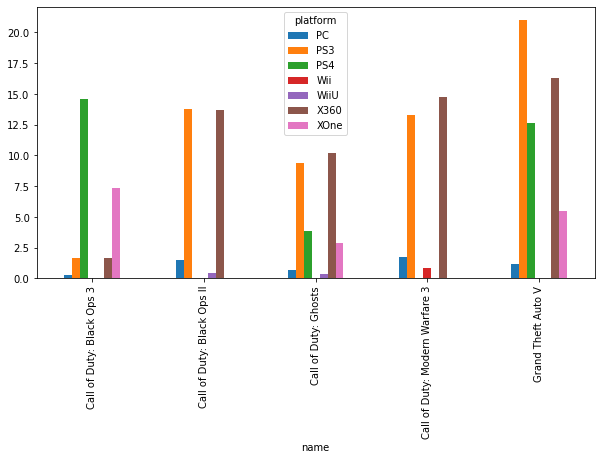

In [28]:
games_filtered_2011_2016_top5.pivot_table(index='name',columns='platform', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(10,5))


<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Perfectamente aplicada la corrección! Excelente gráfica!</div>

En esta gráfica podemos ver que las plataformas de PS3 y Xbox 360 tienen las ventas más altas en 3 juegos de Call of Duty y Grand Theft Auto V

<div class="alert alert-block alert-warning">
<b>Atención V2</b> <a class="tocSkip"></a>

Sólo podrías realizar más observaciones, quizá, por ejemplo, las plataformas de Nintendo tienen buenas ventas para estos juegos multiplataforma? y la PC?</div>

Ahora, vamos a analizar las ventas totales de los juegos por género.

<AxesSubplot:xlabel='genre'>

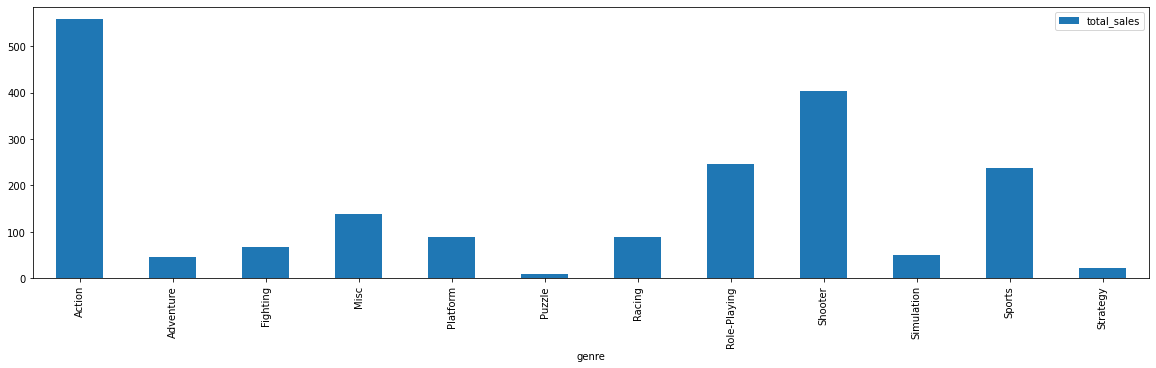

In [29]:
games_filtered_2011_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').plot(kind='bar', figsize=(20,5))

In [30]:
games_filtered_2011_2016.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales',ascending=False).head()

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42


Los géneros de videojuegos con más ventas del 2011 al 2016 son:
- #1 Acción
- #2 Shooter
- #3 Role-playing
- #4 Deporte
- #5 Misc

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Muy bien esta parte! También podrías decir cuáles son los géneros que menos venden</div>

### Analisis por región

Vamos a hacer un analisis por región para Norteamérica, Unión Europea y Japón.

#### Plataformas principales

In [31]:
games_filtered_2011_2016.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65


<AxesSubplot:xlabel='platform'>

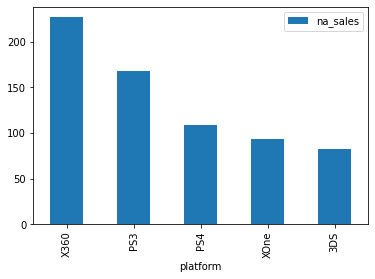

In [32]:
games_filtered_2011_2016.pivot_table(index='platform', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head().plot(kind='bar')

In [33]:
games_filtered_2011_2016.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70


<AxesSubplot:xlabel='platform'>

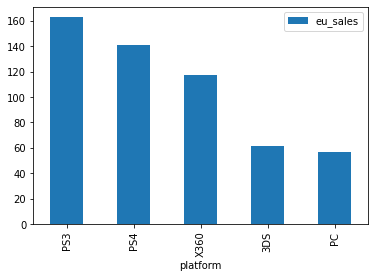

In [34]:
games_filtered_2011_2016.pivot_table(index='platform', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head().plot(kind='bar')

In [35]:
games_filtered_2011_2016.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96


<AxesSubplot:xlabel='platform'>

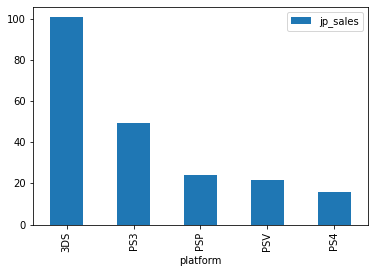

In [36]:
games_filtered_2011_2016.pivot_table(index='platform', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head().plot(kind='bar')

Las plataformas con más videojuegos vendidos, cambia dependiendo de la región. Por ejemplo: el 1er lugar en Norteamérica es Xbox 360, mientras que en Europa el 1er lugar es el PS3 y en Japón el 1er lugar es el Nintendo 3DS.
Además, independientemente de la plataforma, el total de ventas por región varía mucho. Esto puede ser por el tamaño del mercado que existe en cada región. Los primeros lugares de cada región tiene una variación de 63 Millones de dólares entre regiones.

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Muy bien lo que haces arriba! sólo te podría decir que una imagen vale más que mil palabras así que podrías mostrar gráficas en vez de tablas :)</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
De acuerdo, complemento con gráficas. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Genial! Gracias!    
</div>

#### Géneros por región

Vamos a ver ahora el top 5 de géneros de videojuegos por región.

In [37]:
games_filtered_2011_2016.pivot_table(index='genre', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69


<AxesSubplot:xlabel='genre'>

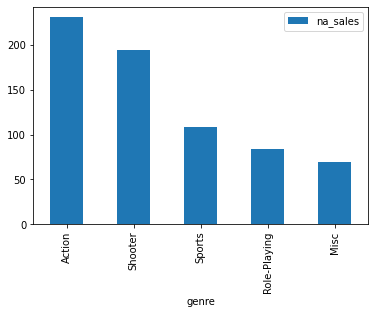

In [38]:
games_filtered_2011_2016.pivot_table(index='genre', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head().plot(kind='bar')

In [39]:
games_filtered_2011_2016.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58


<AxesSubplot:xlabel='genre'>

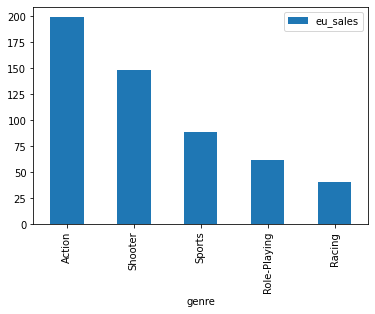

In [40]:
games_filtered_2011_2016.pivot_table(index='genre', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head().plot(kind='bar')

In [41]:
games_filtered_2011_2016.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13


<AxesSubplot:xlabel='genre'>

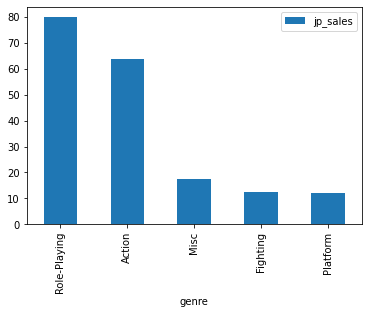

In [42]:
games_filtered_2011_2016.pivot_table(index='genre', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head().plot(kind='bar')

Podemos observar que en Norteamérica y en Europa, los 4 principales géneros concuerdan entre regiones.
- 1ro Action
- 2do Shooter
- 3ro Sports
- 4to Role-playing

Mientras que en Japón, unicamente el género "Action" concuerda con las otras regiones.

<div class="alert alert-block alert-success">
<b>Éxito</b> <a class="tocSkip"></a>

Buenas observaciones!</div>

#### Clasificaciones ESRB por región

Vamos a analizar ahora, cómo van las ventas por región, dependiendo de la clasificación ESRB.

In [43]:
games_filtered_2011_2016.pivot_table(index='rating', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head()

,na_sales
rating,
M,308.45
E,170.17
E10+,117.72
T,109.31
EC,0.42


<AxesSubplot:xlabel='rating'>

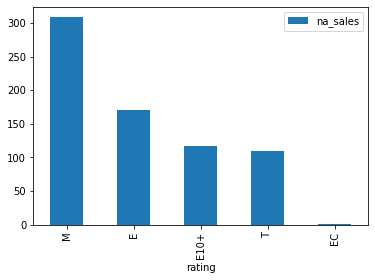

In [44]:
games_filtered_2011_2016.pivot_table(index='rating', values=['na_sales'], aggfunc='sum').sort_values(by='na_sales',ascending=False).head().plot(kind='bar')

In [45]:
games_filtered_2011_2016.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head()

,eu_sales
rating,
M,250.26
E,141.73
T,83.16
E10+,78.00
RP,0.03


<AxesSubplot:xlabel='rating'>

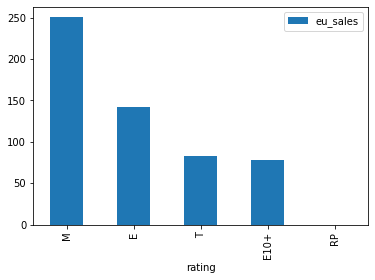

In [46]:
games_filtered_2011_2016.pivot_table(index='rating', values=['eu_sales'], aggfunc='sum').sort_values(by='eu_sales',ascending=False).head().plot(kind='bar')

In [47]:
games_filtered_2011_2016.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head()

,jp_sales
rating,
E,36.68
T,33.39
M,26.14
E10+,11.23
EC,0.00


<AxesSubplot:xlabel='rating'>

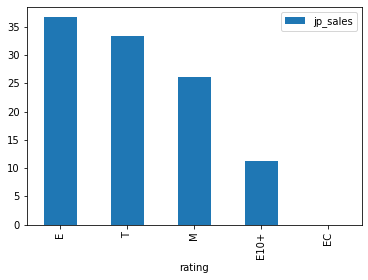

In [48]:
games_filtered_2011_2016.pivot_table(index='rating', values=['jp_sales'], aggfunc='sum').sort_values(by='jp_sales',ascending=False).head().plot(kind='bar')

Las ventas por clasificación ESRB en Norteamérica y Europa son similares, teniendo en los dos primeros lugares las clasificaciones M y E. Por otro lado, Japón tiene en primer lugar la clasifiación E, seguido de T.

En conclusión, vemos que Norteamérica y Europa tienen similitudes en cuanto a las ventas por género de videojuegos y clasificación ESRB. Mientras que Japón, suele tener géneros y clasifiaciones distintas a las otras regiones. Sin embargo, cuando se trata de ventas por plataforma, las 3 regiones tienen plataformas distintas y diferencia de ventas muy grandes.

<div class="alert alert-block alert-warning">
<b>Atención</b> <a class="tocSkip"></a>

Buenas conclusiones en esta parte también! te seguiría haciendo, no obstante, la recomendación de emplear gráficas cuando sea posible pues en tu próximo trabajo a tus jefes tendrás que convencerlos con imágenes!</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
De acuerdo. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Muchas gracias!    
</div>

### Comprobación de hipótesis

Ahora, vamos a comprobar algunas hipotesis que se tienen.

Primero vamos a filtrar las calificaciones promedio de lo usuarios para plataformas de Xbox One y PC en dos diferentes variables. Y además, eliminamos los valores ausentes de ambas variables.

In [49]:
games_xbox_one = games_filtered_2011_2016.query('platform == "XOne"')
games_user_score_xbox_one = games_xbox_one['user_score']
games_user_score_xbox_one = games_user_score_xbox_one.dropna()
games_user_score_xbox_one.head()

165    7.9
179    5.4
242    6.4
270    6.2
373    4.1
Name: user_score, dtype: float64

In [50]:
games_pc = games_filtered_2011_2016.query('platform == "PC"')
games_pc.head()
games_user_score_pc = games_pc['user_score']
games_user_score_pc = games_user_score_pc.dropna()
games_user_score_pc.head()

192    4.0
313    8.1
458    3.9
480    5.9
538    7.5
Name: user_score, dtype: float64

Ahora sí, vamos a comprobar las siguientes hipotesis.

H0:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.


H1:
- Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC no son las mismas.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Lo que dices justo arriba es incorrecto. Por favor, dale un vistazo rápido a las lecciones sobre comprobación de hipótesis para que puedas comprobarlo. Aquí arriba por favor anota tus dos hipótesis, la nula (H0) y la alternativa (H1). Esto te lo recomiendo hacer **siempre** en tus proyectos. La hipótesis nula siempre dice que los promedios son iguales, mientras que la alternativa es la que dice que son diferentes.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Perfecto, ya quedó ajustado. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Perfecto! espero que ya lo tengas más claro :)    
</div>

In [51]:
alpha = 0.05
# si el valor p es menor que alfa, rechazamos la hipótesis

results_hip1 = st.ttest_ind(games_user_score_xbox_one, games_user_score_pc)

print('p-value: ', results_hip1.pvalue)

if results_hip1.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  0.6267602271422398
No rechazamos la hipótesis nula


<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Todo correcto en la celda de arriba, excepto que tienes el atributo `equal_var = False`, y para especificarlo de esta forma necesitas comprobar que las varianzas son diferentes. Esto lo puedes hacer con una prueba de Levene:
    
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    
Y si no compruebas las varianzas, lo mejor es no modificar el atributo equal_var. Sin embargo, yo te recomendaría hacerlo porque así tu prueba T es más precisa.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
De acuerdo. Gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Vale! igual te recomiendo investigar al respecto de la prueba de Levene para que en un futuro tengas más precisión con estas comprobaciones :)    
</div>

El valor p nos dice que aunque las cantidades promedio para ambas plataformas son diferentes, existe un 62% de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. 

Ahora vamos a comprobar la siguiente hipotesis:

H0:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Vamos a filtrar las calificaciones promedio de lo usuarios para los géneros de Acción y Deportes en dos diferentes variables. Y además, eliminamos los valores ausentes de ambas variables.

In [52]:
games_action = games_filtered_2011_2016.query('genre == "Action"')
games_user_score_action = games_action['user_score']
games_user_score_action = games_user_score_action.dropna()
games_user_score_action.head()

16     8.2
23     8.1
42     8.3
81     6.6
118    8.3
Name: user_score, dtype: float64

In [53]:
games_sports = games_filtered_2011_2016.query('genre == "Sports"')
games_user_score_sports = games_sports['user_score']
games_user_score_sports = games_user_score_sports.dropna()
games_user_score_sports.head()

77     4.3
94     5.0
126    4.3
143    5.7
264    4.5
Name: user_score, dtype: float64

Nuestra hipotesis nula sería:

H0:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.

H1:
- Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Aquí arriba tu hipótesis nula es correcta! sólo te pido también anotar la alternativa por favor, como ejercicio
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Tengo una duda, entonces, la hipotesis nula es siempre la que nos dan o como? Estoy confundido, tenía entendido que era el contrario de la que nos dan. :S

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

En este tipo de comprobaciones, cuando quieras verificar si los promedios de dos muestras independientes son iguales, o si son diferentes, no importa, deberás tener que:
    
* Tu hipótesis nula sea la que dice que los promedios **son iguales**.
* Tu hipótesis alternativa sea la que dice que los promedios **son diferentes**.
    
Por definición, así se manejan estas comprobaciones de prueba T.
</div>

In [54]:
alpha = 0.05
# si el valor p es menor que alfa, rechazamos la hipótesis

results_hip2 = st.ttest_ind(games_user_score_action, games_user_score_sports)

print('p-value: ', (results_hip2.pvalue))

if results_hip2.pvalue< alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula") 

p-value:  5.1974550252152054e-24
Rechazamos la hipótesis nula


Rechazamos la hipotesis nula ya que el valor de p (5.19e-24) está muy por debajo del valor de alpha que es 0.05 Esto quiere decir que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Muy bien! pero y esto de arriba qué significa? que las calificaciones son iguales o diferentes?
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Listo, gracias!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Correcto!    
</div>

### Conclusión

Al inicio, encontramos que una columna tenía formato object, por lo que tuvimos que ajustar a formato numérico y ajustar los valores de “tbd” a NaN para poder hacer este ajuste.

No pudimos rellenar los valores ausentes year_of_release ni en score debido a que esta es una pregunta de negocio y no podemos modificar estos valores, ya que podemos estar afectando los resultados. Por lo que pasamos a eliminar los ausentes de year_of_release, name y genre.

Calculamos las ventas totales y la almacenamos en la variable total_sales.

A partir del año 1994, los videojuegos comenzaron a tener un alza en ventas y encontramos que las plataformas con más ventas son las siguientes:
* #1 Playstation 2
* #2 Xbox 360
* #3 Playstation 3
* #4 Wii
* #5 Nintendo DS.

Encontramos que el tiempo aproximado para que una plataforma llegue a su pico máximo de ventas es de 4 a 5 años, y lo mismo sucede con su declive, aproximadamente les toma 5 años.

Encontramos que las plataformas que potencialmente sean rentables ya que van en subida para tener su punto máximo son: PS4 y Xbox One.

Encontramos que hay una correlación positiva entre las calificaciones de los críticos y las ventas de la plataforma PS2, baja pero sí hay una correlación.

Los géneros de videojuegos con más ventas del 2011 al 2016 son:
* #1 Acción
* #2 Shooter
* #3 Role-playing
* #4 Deporte
* #5 Misc

Al hacer un análisis por región vemos que Norteamérica y Europa tienen similitudes en cuanto a las ventas por género de videojuegos y clasificación ESRB. Mientras que Japón, suele tener géneros y clasificaciones distintas a las otras regiones. Sin embargo, cuando se trata de ventas por plataforma, las 3 regiones tienen plataformas distintas y diferencia de ventas muy grandes.

En cuanto a hipótesis, no rechazamos la hipótesis nula de “Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas” mientras que sí rechazamos la hipótesis nula para “Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes no son diferentes.”

<div class="alert alert-block alert-danger">

<b>A resolver</b> <a class="tocSkip"></a>

Muy buenas conclusiones recapitulando todo! :) Sólo te digo que si las correcciones cambian tus resultados, puedes complementar/corregir tus conclusiones en consecuencia, de ser necesario.
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>

    
Corregí cosas mínimas en las conclusiones, como lo de las hipotesis y eliminar valores ausentes en year_of_release, name y genre. Gracias David! Muy buenos comentarios!

<div class="alert alert-block alert-success">
<b>Éxito V2</b> <a class="tocSkip"></a>

Gracias a ti! espero que hayas aprendido algunas cosas y que te haya ayudado, saludos :)    
</div>